# Imports

## Modules

In [1]:
#standard imports
import numpy as np 
import pandas as pd
#data visual imports
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn imports 
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

## Data

In [2]:
# call pandas read csv
df = pd.read_csv('data/wine-clustering.csv')
#call head()
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Inspect data

In [3]:
#call info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
#inspect duplicate values
print(f' Data contains {df.duplicated().sum()} duplicate values')

 Data contains 0 duplicate values


In [5]:
print(f'Data contains {df.isna().sum().sum()} missing values')

Data contains 0 missing values


# Clustering data

## Pre-process data

In [7]:
#call scaler
scaler = StandardScaler()
#scale dataframe
scaled_df = scaler.fit_transform(df)

## Plot inertia and silhouette scores

### Silhouette score

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

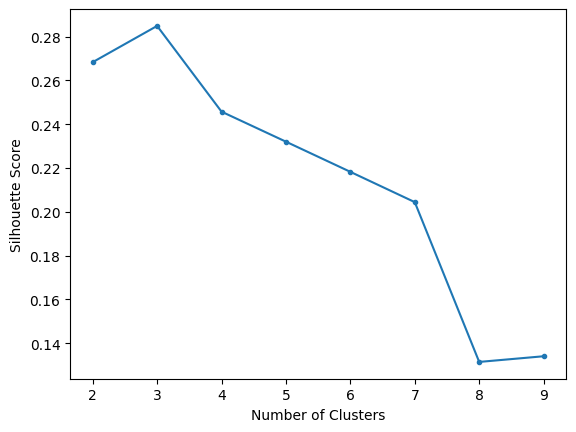

In [8]:
#call empty list 
silhouette_scores = []
#for loop to loop thru num_clusters
for k in range(2, 10): 
    km =KMeans(n_clusters=k) #call instance of model
    km.fit(scaled_df) #fit scaled data
    silhouette_scores.append(silhouette_score(scaled_df, km.labels_)) #append scores to list
#call plt plot
plt.plot(range(2, 10), silhouette_scores, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

The plot elbows at 4, meaning 4 clusters would be optimal.

### Inertia score

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

Text(0, 0.5, 'Clusters')

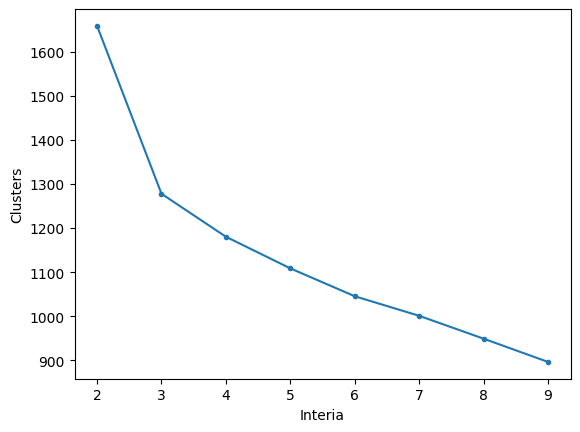

In [9]:
#save empty list for scores
inertias = []
#for loop to loop through num_clusters
for k in range(2,10):
    km = KMeans(n_clusters=k) #call instance of model
    km.fit(scaled_df) #fit scaled data
    inertias.append(km.inertia_) #save scores to list
#call plt plot
plt.plot(range(2, 10), inertias, marker='.')
#call axis labels
plt.xlabel('Interia')
plt.ylabel('Clusters')

The plot elbows at 3, implying 3 is the optimal cluster amount.

## KMeans Clustering

### 3 Clusters

In [10]:
#call instance of model with 3 clusters
km3 = KMeans(n_clusters=3)
#fit scaled df
km3.fit(scaled_df)
#add clusters as feature in df
df['cluster']=km3.labels_
df.to_csv('3_clusters')
#inspect new featureb
df['cluster'].value_counts()

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    65
0    62
1    51
Name: cluster, dtype: int64

### 4 Clusters 

In [13]:
#call instance of model with 4 clusters
km4 = KMeans(n_clusters=4)
#fit scaled df
km4.fit(scaled_df)
#add clusters as feature in df
df['cluster']=km4.labels_
df.to_csv('4_clusters')
#inspect new featureb
df['cluster'].value_counts()

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    55
3    49
1    44
0    30
Name: cluster, dtype: int64

## KMeans Clustering w/PCA

### PCA

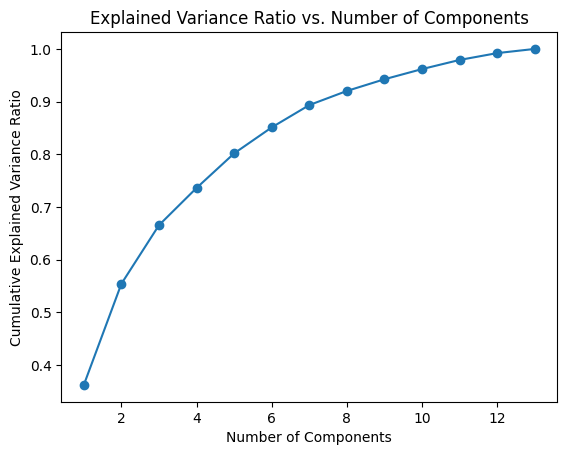

In [16]:
#call instance of pca
pca = PCA()
#fit data to scaled_df
pca.fit(scaled_df)
#Call plt plot to show cevr
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
        np.cumsum(pca.explained_variance_ratio_), marker='o')
#call axis labels
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
#call title
plt.title('Explained Variance Ratio vs. Number of Components')
#show plot
plt.show()

Optimum n_components is 5 at %80 variance

In [17]:
#call instance of pca
pca = PCA(n_components=5)
#fit data to scaled_df
pca_data = pca.fit(scaled_df)
#create dataframe
df_pca = pd.DataFrame(pca_data.fit_transform(scaled_df), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
#inspect dataframe
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458


### Plot inertia and silhouette scores

#### Silhouette score

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

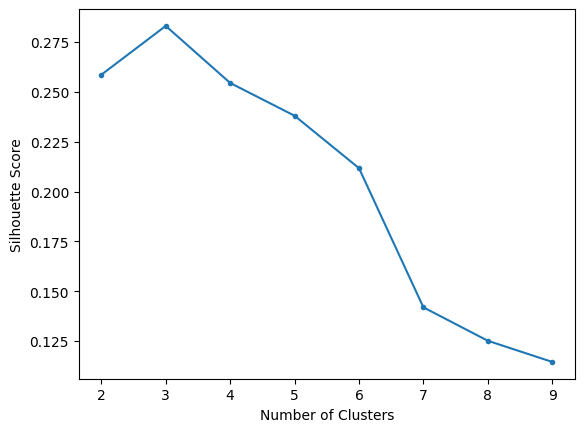

In [18]:
#call empty list 
silhouette_scores = []
#for loop to loop thru num_clusters
for k in range(2, 10): 
    km =KMeans(n_clusters=k) #call instance of model
    km.fit(df_pca) #fit pca data
    silhouette_scores.append(silhouette_score(scaled_df, km.labels_)) #append scores to list
#call plt plot
plt.plot(range(2, 10), silhouette_scores, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Optimum n_clusters seams to be 5

#### Inertia score

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

Text(0, 0.5, 'Clusters')

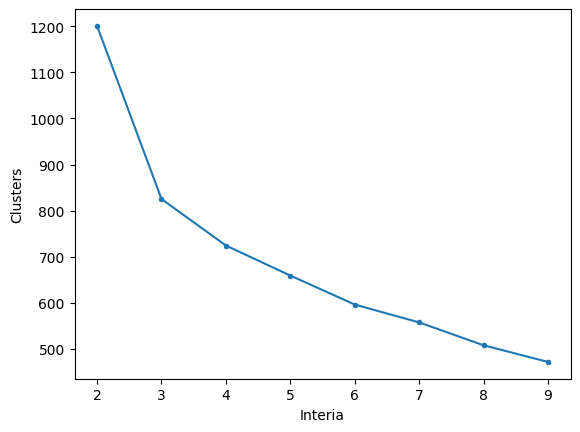

In [19]:
#save empty list for scores
inertias = []
#for loop to loop through num_clusters
for k in range(2,10):
    km = KMeans(n_clusters=k) #call instance of model
    km.fit(df_pca) #fit scaled data
    inertias.append(km.inertia_) #save scores to list
#call plt plot
plt.plot(range(2, 10), inertias, marker='.')
#call axis labels
plt.xlabel('Interia')
plt.ylabel('Clusters')

The optimum n_clusters seams to be 3

### 3 Clusters

In [20]:
#call instance of model with 3 clusters
km3 = KMeans(n_clusters=3)
#fit scaled df
km3.fit(df_pca)
#add clusters as feature in df
df['cluster']=km3.fit_predict(df_pca)
df.to_csv('3_pca')
#inspect new featureb
df['cluster'].value_counts()

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    65
1    62
2    51
Name: cluster, dtype: int64

### 5 Clusters

In [23]:
#call instance of model with 3 clusters
km5 = KMeans(n_clusters=5)
#fit scaled df
km5.fit(df_pca)
#add clusters as feature in df
df['cluster']=km5.fit_predict(df_pca)
df.to_csv('5_pca')
#inspect new featureb
df['cluster'].value_counts()

C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\camer\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    53
4    49
1    41
3    30
2     5
Name: cluster, dtype: int64